In [ ]:
# Importowanie potrzebnych bibliotek i modułów
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

import keras
from keras import layers

In [ ]:
# Tworzenie zbioru danych
X, y = make_moons(n_samples=10000, noise=0.4, random_state=42)

# Podział danych na zbiory uczący i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Tworzenie modelu sieci neuronowej
inputs = keras.Input(shape=(2,))
hidden_layer = layers.Dense(32, activation="relu")(inputs)
outputs = layers.Dense(1, activation='sigmoid')(hidden_layer)
model = keras.Model(inputs=inputs, outputs=outputs, name="fun_API")

Model: "fun_API"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_4 (Dense)             (None, 32)                96        
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 129 (516.00 Byte)
Trainable params: 129 (516.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


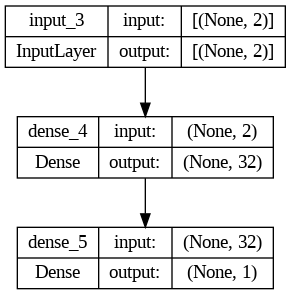

In [ ]:
# wizualizacja modelu
model.summary()
keras.utils.plot_model(model, "my_first_model.png",show_shapes=True)

In [ ]:
# Kompilacja modelu
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Trenowanie modelu
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
250/250 [==============================] - 3s 6ms/step - loss: 0.5043 - accuracy: 0.7624 - val_loss: 0.3736 - val_accuracy: 0.8425
Epoch 2/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3825 - accuracy: 0.8342 - val_loss: 0.3512 - val_accuracy: 0.8420
Epoch 3/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3760 - accuracy: 0.8364 - val_loss: 0.3477 - val_accuracy: 0.8430
Epoch 4/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3732 - accuracy: 0.8370 - val_loss: 0.3471 - val_accuracy: 0.8445
Epoch 5/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3715 - accuracy: 0.8353 - val_loss: 0.3448 - val_accuracy: 0.8445
Epoch 6/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3701 - accuracy: 0.8372 - val_loss: 0.3449 - val_accuracy: 0.8440
Epoch 7/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3692 - accuracy: 0.8359 - val_loss: 0.3434 - val_accuracy: 0.8445

In [ ]:
# Ocena modelu na danych testowych
_, test_accuracy = model.evaluate(X_test, y_test)
_, train_accuracy = model.evaluate(X_train, y_train)

250/250 [==============================] - 1s 3ms/step - loss: 0.3175 - accuracy: 0.8622


313/313 [==============================] - 1s 2ms/step


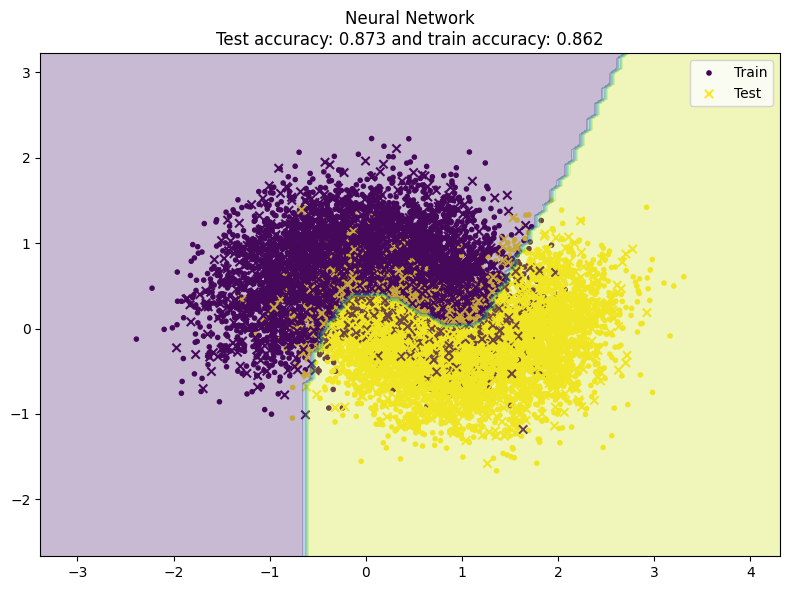

In [ ]:
# Rysowanie granicy decyzyjnej dla sieci neuronowej
plt.figure(figsize=(8, 6))
# Rysowanie punktów danych treningowych
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker='.', label='Train')
# Rysowanie punktów danych testowych
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='x', label='Test')
# Tworzenie siatki punktów dla wykresu konturu decyzji
xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
                     np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100))
# Dokonanie predykcji na punktach siatki
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
# Wstępna wizualizacja predykcji
Z = np.round(Z).reshape(xx.shape)
# Rysowanie konturu decyzji
plt.contourf(xx, yy, Z, alpha=0.3)
# Ustawienie tytułu wykresu
plt.title(f"Neural Network\nTest accuracy: {test_accuracy:.3f} and train accuracy: {train_accuracy:.3f}")
# Dodanie legendy
plt.legend()
# Wyświetlenie wykresu
plt.tight_layout()
plt.show()

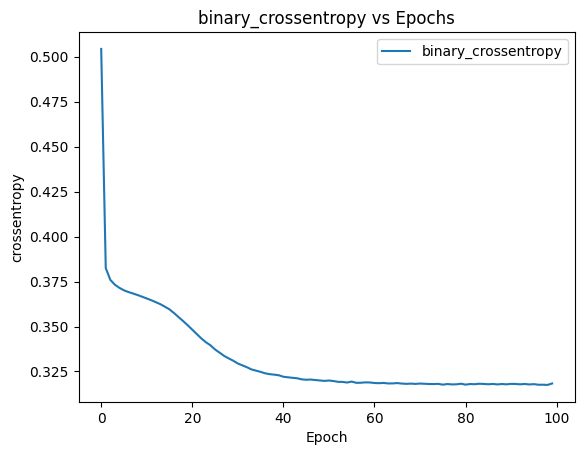

In [ ]:
# Wykres MSE vs epoki
plt.plot(history.history['loss'], label='binary_crossentropy')
plt.title('binary_crossentropy vs Epochs')
plt.ylabel('crossentropy')
plt.xlabel('Epoch')
plt.legend(loc="upper right")
plt.show()

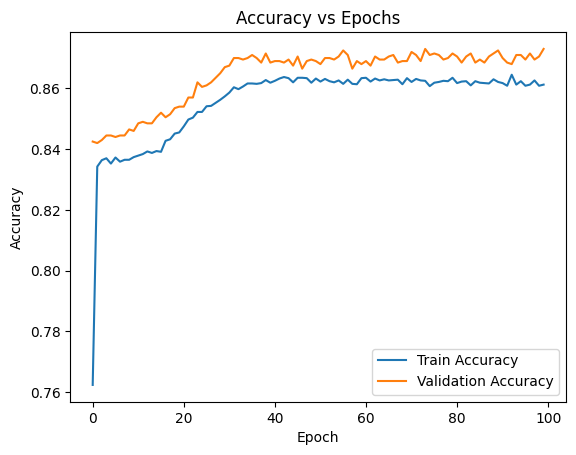

In [ ]:
# Wykres MSE vs epoki
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy vs Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc="lower right")
plt.show()